# Comparing the Models
We trained two models. MultiLabelResnet uses Resnet50 as a base model followed by a simple linear layer. MultiLabelCNN is a CNN model build without a base model. It has a CNN layer which consist of multiple convolutional, pooling and norming layers. The CNN layer is followed by a simple linear layer to get the label predictions.

Here are some comparisons between the models.

In [60]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [42]:
def load_model_metadata(model):
    with open(f'saved_models/{model}/metadata.json', 'r') as f:
        data = json.load(f)
    return data

## Test Set Results
First we compare the results when predicting with the test set. As you can see from the results here, the Resnet model won by a slight margin.

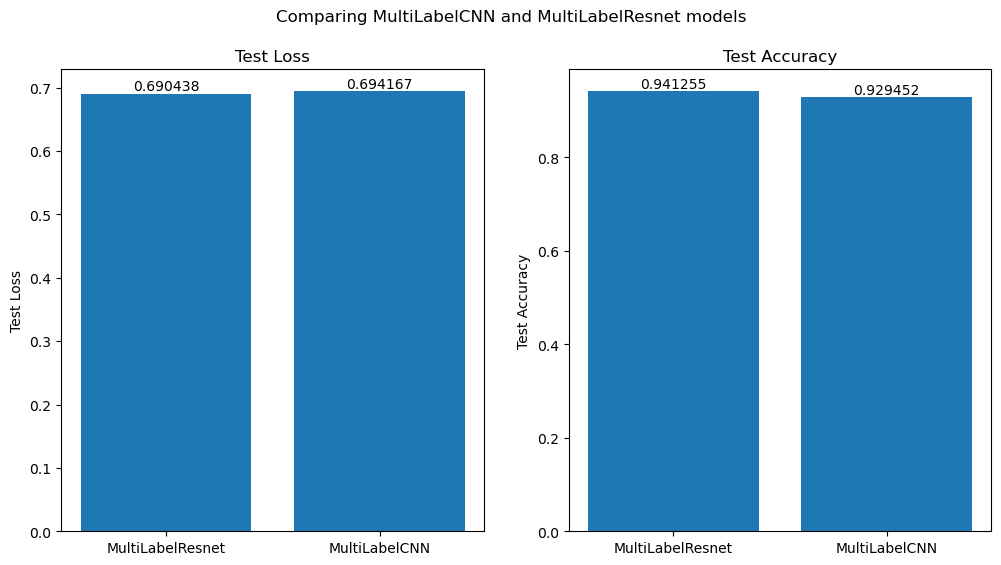

In [43]:
#COMPARING MODELS

cnn = load_model_metadata("MultiLabelCNN")
resnet = load_model_metadata("MultiLabelResnet")

model_names = [resnet["model_name"], cnn["model_name"]]
test_loss = [resnet["test_loss"], cnn["test_loss"]]
test_accuracy = [resnet["test_accuracy"], cnn["test_accuracy"]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparing MultiLabelCNN and MultiLabelResnet models")

#Loss
bar1 = ax1.bar(model_names, test_loss)
ax1.set_title('Test Loss')
ax1.set_ylabel('Test Loss')
ax1.bar_label(bar1)

#Accuracy
bar2 = ax2.bar(model_names, test_accuracy)
ax2.set_title('Test Accuracy')
ax2.set_ylabel('Test Accuracy')
ax2.bar_label(bar2)

plt.show()

## Comparing training sessions

In [64]:
def plot_training_results(model):
    data = load_model_metadata(model)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) #
    fig.suptitle(data['model_name'])
    
    epochs = len(data["train_loss"])

    #Loss
    ax1.plot(range(1, epochs + 1), data['train_loss'], label='Training Loss')
    ax1.plot(range(1, epochs + 1), data['val_loss'], label='Validation Loss')
    if data["early_stop"]:
        ax1.axvline(data['best_epoch'], color='red', linestyle='--', label='Best Epoch')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    

    #Accuracy
    ax2.plot(range(1, epochs + 1), data['train_accuracy'], label='Training Accuracy')
    ax2.plot(range(1, epochs + 1), data['val_accuracy'], label='Validation Accuracy')
    if data["early_stop"]:
        ax2.axvline(data['best_epoch'], color='red', linestyle='--', label='Best Epoch')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

### MultiLabelCNN Training sessions
Below are results from the MultiLabelCNN training session. The model converges to final result pretty quickly. The vertical red line shows the best epoch, to which the model state was returned after early stopping.

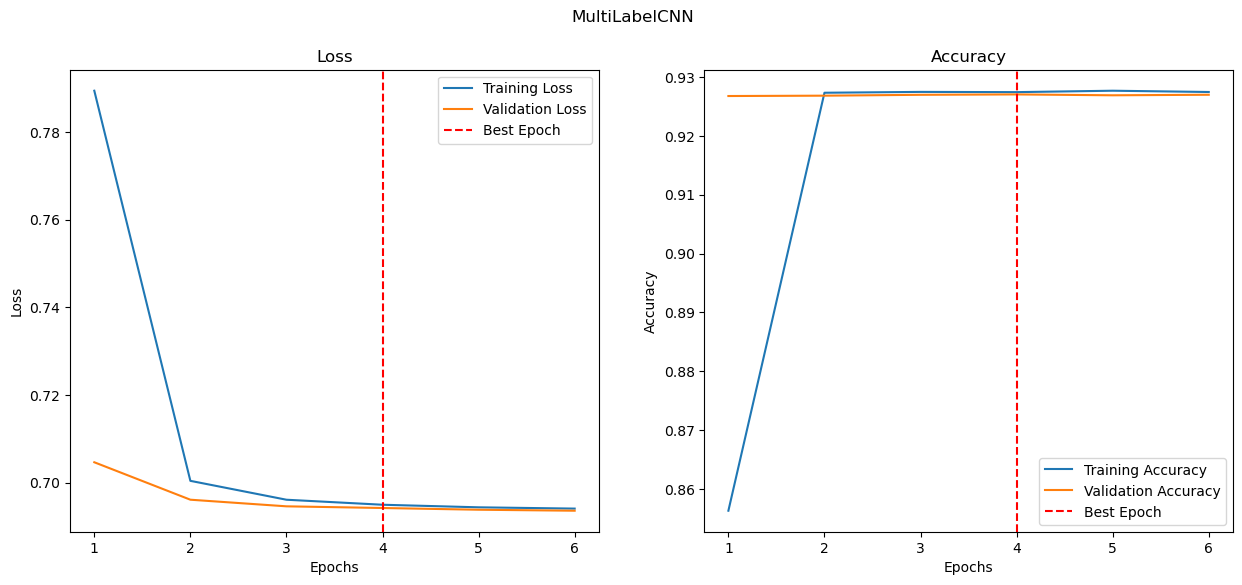

In [65]:
model = "MultiLabelCNN"
plot_training_results(model)

### MultiLabelResnet Training sessions
Below are results from the MultiLabelResnet training session. The Resnet model is slower to train, taking many more epochs to get the best result than the CNN model.

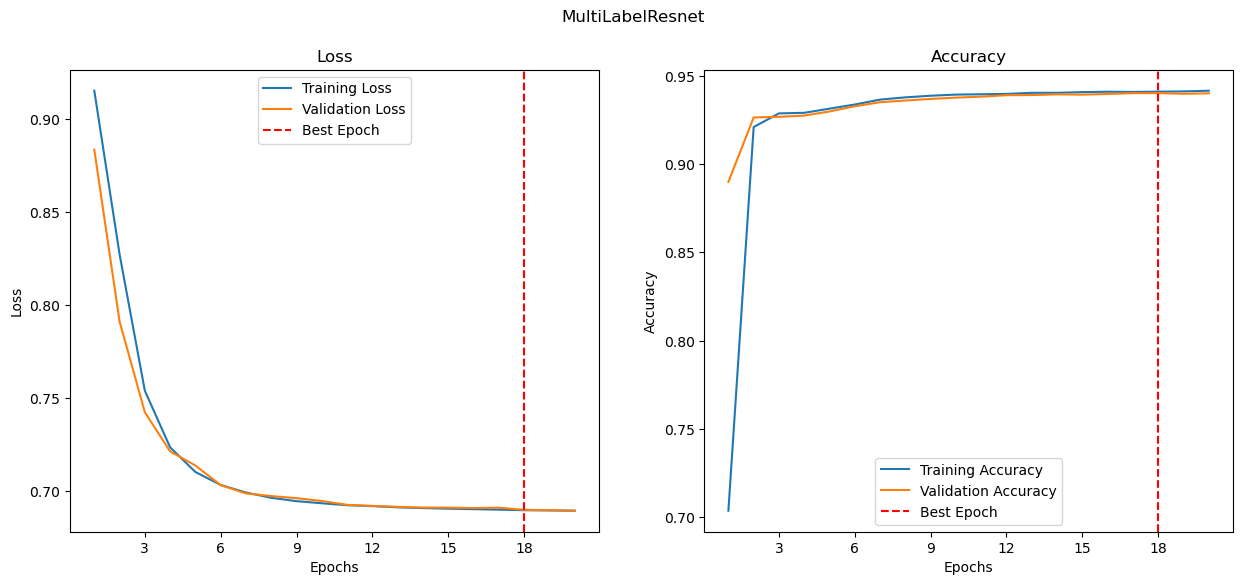

In [66]:
model = "MultiLabelResnet"
plot_training_results(model)